In [5]:
from confidence_intervals import ci_bo
from botorch.test_functions import Ackley

# Low dimension Ackley function tests
ucb_2, ucb_ci_2 = ci_bo(dim=2, acqf_type='qUCB', batch_size=5, epochs=15, n_init=25, N_TRIALS=1, function=Ackley, lower_bound=-32.176, upper_bound=32.176,super_seed=1)
ei_2, ei_ci_2 = ci_bo(dim=2, acqf_type='qEI', batch_size=5, epochs=15, n_init=25, N_TRIALS=1, function=Ackley, lower_bound=-32.176, upper_bound=32.176,super_seed=2)
pi_2, pi_ci_2 = ci_bo(dim=2, acqf_type='qPI', batch_size=5, epochs=15, n_init=25, N_TRIALS=1, function=Ackley, lower_bound=-32.176, upper_bound=32.176,super_seed=3)


/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(
/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(
/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(
/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are be

In [8]:
from confidence_intervals import compare_acquisition_functions

compare_acquisition_functions(ucb_2, ucb_ci_2, ei_2, ei_ci_2, pi_2, pi_ci_2, filename='Ackley, dim=2')

  Comparison Best Superior
0     U vs E    E       No
1     U vs P    P       No
2     E vs P    P       No


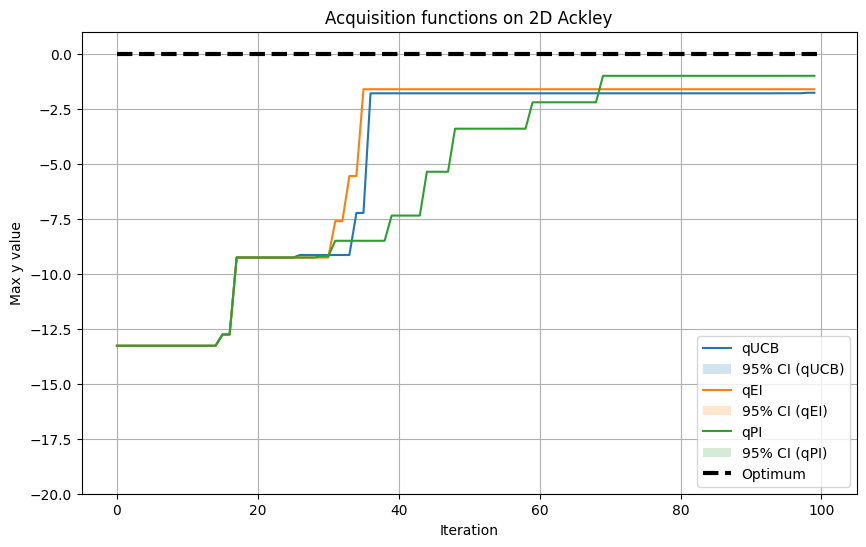

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from confidence_intervals import plot_acquisition_functions 

# Example usage with the given arrays
plot_acquisition_functions(ucb_2, ucb_ci_2, ei_2, ei_ci_2, pi_2, pi_ci_2)
